### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:

import pandas as pd

# ... (your existing code to import the dataframes)

# Concatenate the dataframes
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Display the first few rows of the combined dataframe
tiendas.head()


# Install the necessary library
!pip install gspread

# Authenticate with Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Create a new spreadsheet
sh = gc.create('Tiendas')

# Open the first sheet of the spreadsheet
worksheet = sh.sheet1

# Convert the DataFrame to a list of lists
data = tiendas.values.tolist()

# Add the header row to the data
header = tiendas.columns.tolist()
data.insert(0, header)

# Update the worksheet with the data
worksheet.update('A1', data)

print(f"The data has been successfully uploaded to Google Sheets: {sh.url}")


<ipython-input-8-9f973bb4d5dd>:41: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('A1', data)


The data has been successfully uploaded to Google Sheets: https://docs.google.com/spreadsheets/d/1iNCgFYSOj7fOFkfgx1W4q3nAXB-ThIYAzugWCj1YdwM


#1. Análisis de facturación



In [ ]:

import pandas as pd

def analyze_store_data(df, store_name):
  """Analyzes a store's data and prints column information."""

  print(f"Análisis de la tienda: {store_name}")
  num_cols = len(df.columns)
  print(f"Número de columnas: {num_cols}")

  for col in df.columns:
    print(f"\nColumna: {col}")
    print(f"  Tipo de dato: {df[col].dtype}")
    print(f"  Valores totales: {len(df[col])}")
    print(f"  Valores distintos: {df[col].nunique()}")
    #print(f"Primeros 5 valores:{df[col].unique()[:5]}") #optional, uncomment if needed


# URLs de los archivos CSV
urls = {
    "tienda_1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "tienda_2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "tienda_3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "tienda_4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Procesar cada tienda
for store_name, url in urls.items():
  try:
    df = pd.read_csv(url)
    analyze_store_data(df, store_name)
    print("-" * 40)  # Separador entre tiendas
  except Exception as e:
      print(f"Error procesando {store_name}: {e}")


Análisis de la tienda: tienda_1
Número de columnas: 12

Columna: Producto
  Tipo de dato: object
  Valores totales: 2359
  Valores distintos: 51

Columna: Categoría del Producto
  Tipo de dato: object
  Valores totales: 2359
  Valores distintos: 8

Columna: Precio
  Tipo de dato: float64
  Valores totales: 2359
  Valores distintos: 1937

Columna: Costo de envío
  Tipo de dato: float64
  Valores totales: 2359
  Valores distintos: 753

Columna: Fecha de Compra
  Tipo de dato: object
  Valores totales: 2359
  Valores distintos: 1018

Columna: Vendedor
  Tipo de dato: object
  Valores totales: 2359
  Valores distintos: 14

Columna: Lugar de Compra
  Tipo de dato: object
  Valores totales: 2359
  Valores distintos: 19

Columna: Calificación
  Tipo de dato: int64
  Valores totales: 2359
  Valores distintos: 5

Columna: Método de pago
  Tipo de dato: object
  Valores totales: 2359
  Valores distintos: 4

Columna: Cantidad de cuotas
  Tipo de dato: int64
  Valores totales: 2359
  Valores disti

In [ ]:

import pandas as pd

# URLs de los archivos CSV
urls = {
    "tienda_1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "tienda_2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "tienda_3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "tienda_4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

total_revenue = []

# Procesar cada tienda
for store_name, url in urls.items():
  try:
    df = pd.read_csv(url)
    revenue = df['Precio'].sum()
    total_revenue.append([store_name, revenue])
  except Exception as e:
      print(f"Error procesando {store_name}: {e}")

# Crear DataFrame para la visualización
revenue_df = pd.DataFrame(total_revenue, columns=['Tienda', 'Ingreso Total'])

# Mostrar la tabla de ingresos totales
print(revenue_df.to_string(index=False))


  Tienda  Ingreso Total
tienda_1   1150880400.0
tienda_2   1116343500.0
tienda_3   1098019600.0
tienda_4   1038375700.0


In [ ]:

import pandas as pd


# Calculate total revenue across all stores
total_revenue_all_stores = revenue_df['Ingreso Total'].sum()

# Calculate the percentage of revenue for each store
revenue_df['Porcentaje del Total'] = (revenue_df['Ingreso Total'] / total_revenue_all_stores) * 100

# Display the table with percentages
print(revenue_df.to_string(index=False))

print(f"\nIngreso total de todas las tiendas: {total_revenue_all_stores}")


  Tienda  Ingreso Total  Porcentaje del Total
tienda_1   1150880400.0             26.134876
tienda_2   1116343500.0             25.350591
tienda_3   1098019600.0             24.934481
tienda_4   1038375700.0             23.580052

Ingreso total de todas las tiendas: 4403619200.0


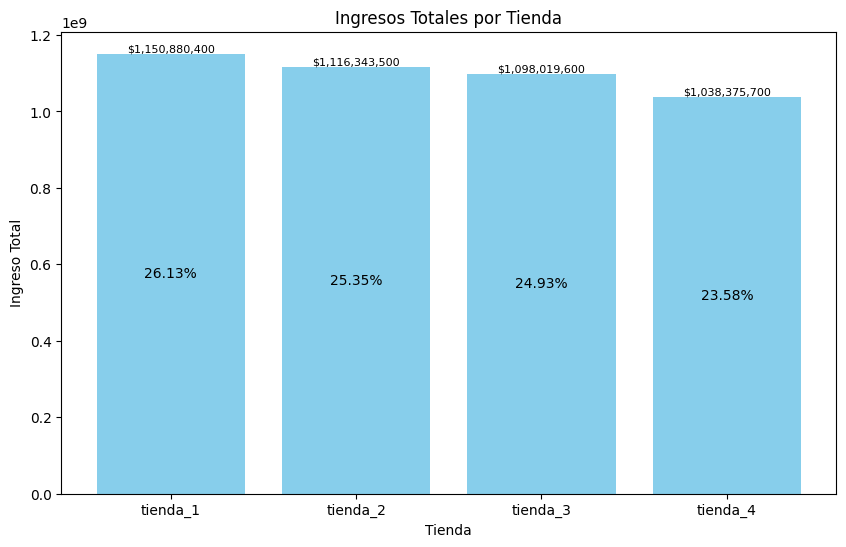

In [ ]:

import matplotlib.pyplot as plt



# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_df['Tienda'], revenue_df['Ingreso Total'], color='skyblue')
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")
plt.title("Ingresos Totales por Tienda")

# Add percentage labels to the bars
for bar, percentage in zip(bars, revenue_df['Porcentaje del Total']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'{percentage:.2f}%', ha='center', va='center', color='black', fontsize=10)

    plt.text(bar.get_x() + bar.get_width()/2, yval , f'${yval:,.0f}', ha='center', va='bottom', color='black', fontsize=8)


plt.show()


In [ ]:


import plotly.express as px

# Assuming revenue_df is already created as in the previous code

fig = px.pie(revenue_df, values='Ingreso Total', names='Tienda', title='Ingreso Total por Tienda')
fig.show()


# 2. Ventas por categoría


Total de Categorías por Tienda:
  Tienda  Total de Categorías
tienda_1                    8
tienda_2                    8
tienda_3                    8
tienda_4                    8


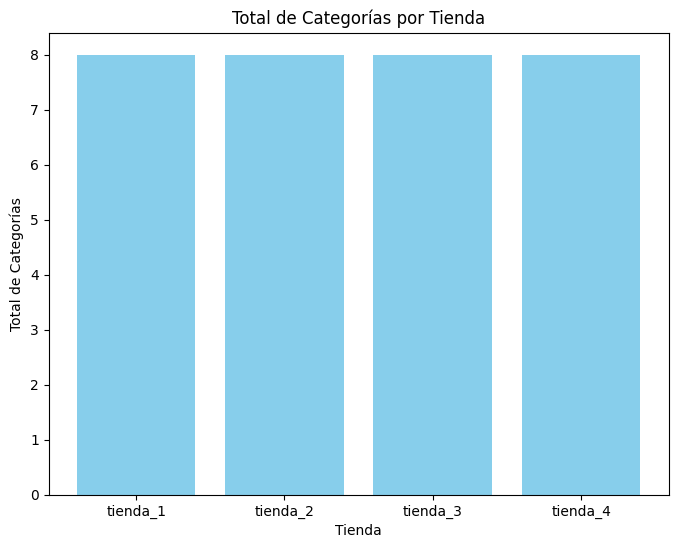

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
# ... (previous code remains unchanged)

# Calculate total categories per store
categories_per_store = {}
for store_name, url in urls.items():
  try:
    df = pd.read_csv(url)
    categories_per_store[store_name] = df['Categoría del Producto'].nunique()
  except Exception as e:
    print(f"Error processing {store_name}: {e}")

# Create a DataFrame for the visualization
categories_df = pd.DataFrame(list(categories_per_store.items()), columns=['Tienda', 'Total de Categorías'])

# Display the table of total categories per store
print("\nTotal de Categorías por Tienda:")
print(categories_df.to_string(index=False))

# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
plt.bar(categories_df['Tienda'], categories_df['Total de Categorías'], color='skyblue')
plt.xlabel("Tienda")
plt.ylabel("Total de Categorías")
plt.title("Total de Categorías por Tienda")
plt.show()


In [ ]:

import pandas as pd

# Create a combined DataFrame
stores = [tienda, tienda2, tienda3, tienda4]
store_names = ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']
combined_df = pd.DataFrame()

for i, df in enumerate(stores):
    df['Tienda'] = store_names[i]
    combined_df = pd.concat([combined_df, df], ignore_index=True)


# Assign a numerical ID to each product based on its name
combined_df['product_id'] = combined_df.groupby('Producto').ngroup()

# Group by category and store, then count product IDs
grouped_data = combined_df.groupby(['Categoría del Producto', 'Tienda'])['product_id'].count().reset_index()
grouped_data.rename(columns={'product_id': 'Total IDs'}, inplace=True)


# Display the resulting DataFrame
print(grouped_data)

# Visualization of the result (example using plotly express)
import plotly.express as px

fig = px.bar(grouped_data, x='Categoría del Producto', y='Total IDs', color='Tienda', barmode='group',
             title='Total de IDs de Productos por Categoría y Tienda')
fig.show()


     Categoría del Producto    Tienda  Total IDs
0   Artículos para el hogar  tienda_1        171
1   Artículos para el hogar  tienda_2        181
2   Artículos para el hogar  tienda_3        177
3   Artículos para el hogar  tienda_4        201
4      Deportes y diversión  tienda_1        284
5      Deportes y diversión  tienda_2        275
6      Deportes y diversión  tienda_3        277
7      Deportes y diversión  tienda_4        277
8         Electrodomésticos  tienda_1        312
9         Electrodomésticos  tienda_2        305
10        Electrodomésticos  tienda_3        278
11        Electrodomésticos  tienda_4        254
12             Electrónicos  tienda_1        448
13             Electrónicos  tienda_2        422
14             Electrónicos  tienda_3        451
15             Electrónicos  tienda_4        451
16   Instrumentos musicales  tienda_1        182
17   Instrumentos musicales  tienda_2        224
18   Instrumentos musicales  tienda_3        177
19   Instrumentos mu

In [ ]:


# Top 5 products by store
top_products = combined_df.groupby(['Tienda', 'Producto'])['Precio'].sum().reset_index()
top_products = top_products.sort_values(['Tienda', 'Precio'], ascending=[True, False])
for store in top_products['Tienda'].unique():
    print(f"\nTop 5 productos más vendidos en {store}:")
    print(top_products[top_products['Tienda'] == store].head(5))


# Top 5 categories by store
top_categories = combined_df.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()
top_categories = top_categories.sort_values(['Tienda', 'Precio'], ascending=[True, False])

for store in top_categories['Tienda'].unique():
    print(f"\nTop 5 categorías más vendidas en {store}:")
    print(top_categories[top_categories['Tienda'] == store].head(5))



Top 5 productos más vendidos en tienda_1:
      Tienda          Producto       Precio
48  tienda_1     TV LED UHD 4K  142150200.0
39  tienda_1      Refrigerador  112143300.0
25  tienda_1         Iphone 15   97902200.0
45  tienda_1          Smart TV   67452100.0
28  tienda_1  Lavadora de ropa   65783600.0

Top 5 productos más vendidos en tienda_2:
      Tienda          Producto       Precio
76  tienda_2         Iphone 15  113225800.0
99  tienda_2     TV LED UHD 4K  103375000.0
90  tienda_2      Refrigerador   97632500.0
79  tienda_2  Lavadora de ropa   66762300.0
96  tienda_2          Smart TV   61142000.0

Top 5 productos más vendidos en tienda_3:
       Tienda       Producto      Precio
141  tienda_3   Refrigerador  99889700.0
150  tienda_3  TV LED UHD 4K  96669100.0
127  tienda_3      Iphone 15  93225700.0
147  tienda_3       Smart TV  78837300.0
131  tienda_3   Lavavajillas  64364800.0

Top 5 productos más vendidos en tienda_4:
       Tienda       Producto      Precio
178  tienda_4

In [ ]:

import pandas as pd
def analyze_sales_by_seller(df, store_name):
    """Analyzes sales data by seller for a given store."""

    sales_by_seller = df.groupby('Vendedor')['Precio'].agg(['sum', 'count'])
    sales_by_seller = sales_by_seller.rename(columns={'sum': 'Total Vendido', 'count': 'Cantidad de Ventas'})
    sales_by_seller = sales_by_seller.sort_values(by='Total Vendido', ascending=False)

    total_sales_store = sales_by_seller['Total Vendido'].sum()
    print(f"\nVentas totales de la tienda {store_name}: {total_sales_store}")

    return sales_by_seller


# Process each store
for store_name, url in urls.items():
    try:
        df = pd.read_csv(url)
        sales_data = analyze_sales_by_seller(df, store_name)
        print(sales_data.to_string())
        print("-" * 40)  # Separator between stores

    except Exception as e:
        print(f"Error procesando {store_name}: {e}")



Ventas totales de la tienda tienda_1: 1150880400.0
                 Total Vendido  Cantidad de Ventas
Vendedor                                          
Maria Alfonso      101528700.0                 173
Rafael Acosta       96271300.0                 171
Izabela de León     93776500.0                 197
Felipe Santos       90206900.0                 170
Juliana Costa       85678500.0                 169
Lucas Olivera       84882800.0                 166
Pedro Gomez         82973900.0                 169
Beatriz Morales     79347300.0                 165
Juan Fernandez      78040000.0                 163
Camila Rivera       75847900.0                 167
Blanca Ramirez      74766300.0                 180
Mariana Herrera     71352200.0                 156
Santiago Silva      70093900.0                 144
Ángel Rodriguez     66114200.0                 169
----------------------------------------

Ventas totales de la tienda tienda_2: 1116343500.0
                 Total Vendido  Cantida

# 3. Calificación promedio de la tienda



Calificación promedio por tienda:
Tienda
tienda_1    3.976685
tienda_2    4.037304
tienda_3    4.048326
tienda_4    3.995759
Name: Calificación, dtype: float64


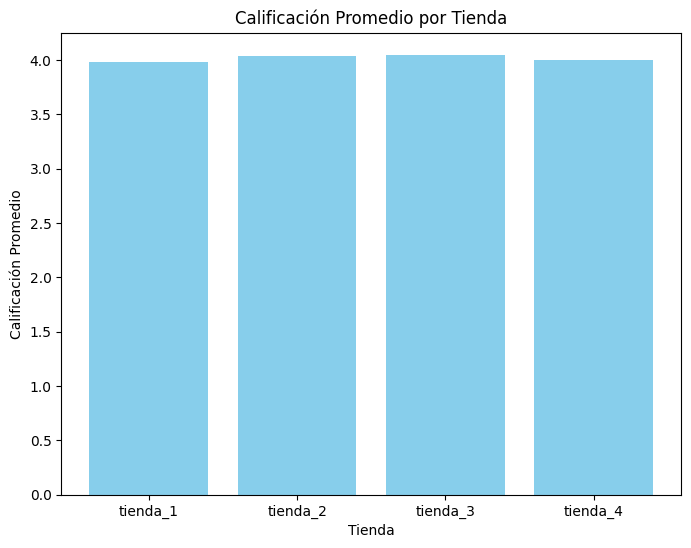

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


# Recreate combined_df (as it might not be available in this cell's scope)
stores = [tienda, tienda2, tienda3, tienda4]
store_names = ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']
combined_df = pd.DataFrame()

for i, df in enumerate(stores):
    df['Tienda'] = store_names[i]
    combined_df = pd.concat([combined_df, df], ignore_index=True)


# Calculate the average rating for each store
average_ratings = combined_df.groupby('Tienda')['Calificación'].mean()

# Print the results
print("\nCalificación promedio por tienda:")
print(average_ratings)

# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
plt.bar(average_ratings.index, average_ratings.values, color='skyblue')
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda")
plt.show()

In [ ]:


# 5 productos con peor calificación por tienda
worst_products = combined_df.groupby(['Tienda', 'Producto'])['Calificación'].mean().reset_index()
worst_products = worst_products.sort_values(['Tienda', 'Calificación'], ascending=[True, True])

worst_products_per_store = {}
for store in worst_products['Tienda'].unique():
    worst_products_per_store[store] = worst_products[worst_products['Tienda'] == store].head(10)

# Análisis de productos repetidos entre tiendas
repeated_products = {}
for store, products in worst_products_per_store.items():
    for product in products['Producto']:
        if product not in repeated_products:
            repeated_products[product] = 1
        else:
            repeated_products[product] += 1

# Mostrar los resultados
print("\n5 productos con peor calificación por tienda:")
for store, products in worst_products_per_store.items():
    print(f"\nTienda: {store}")
    print(products)

print("\nProductos repetidos en el peor 10 de calificación y número de tiendas:")
for product, count in repeated_products.items():
  if count > 1:
    print(f"Producto: {product}, Número de tiendas: {count}")



5 productos con peor calificación por tienda:

Tienda: tienda_1
      Tienda             Producto  Calificación
42  tienda_1         Set de vasos      3.292683
41  tienda_1         Set de ollas      3.581395
17  tienda_1   Cuerda para saltar      3.625000
3   tienda_1          Auriculares      3.640000
35  tienda_1  Modelado predictivo      3.647059
37  tienda_1      Olla de presión      3.771429
11  tienda_1            Cama king      3.772727
19  tienda_1       Dinosaurio Rex      3.775000
31  tienda_1      Mesa de comedor      3.800000
32  tienda_1        Mesa de noche      3.803571

Tienda: tienda_2
       Tienda                     Producto  Calificación
66   tienda_2                   Cubertería      3.615385
67   tienda_2              Cubo mágico 8x8      3.622222
101  tienda_2                 Vaso térmico      3.659574
87   tienda_2                  Muñeca bebé      3.708333
79   tienda_2             Lavadora de ropa      3.734694
76   tienda_2                    Iphone 15     

# 4. Productos más y menos vendidos

In [ ]:

# Calculate the number of times each product was sold in each store
product_sales = combined_df.groupby(['Tienda', 'Producto'])['Precio'].count().reset_index()
product_sales = product_sales.rename(columns={'Precio': 'Cantidad Vendida'})


# Function to get top and bottom N products
def get_top_bottom_products(df, store, n=5):
    store_data = df[df['Tienda'] == store].sort_values('Cantidad Vendida', ascending=False)
    top_products = store_data.head(n)
    bottom_products = store_data.tail(n)
    return top_products, bottom_products


# Analyze each store
for store in product_sales['Tienda'].unique():
    top, bottom = get_top_bottom_products(product_sales, store)
    print(f"\nTienda: {store}")
    print(f"\nTop {len(top)} productos más vendidos:")
    print(top)
    print(f"\nBottom {len(bottom)} productos menos vendidos:")
    print(bottom)


# Visualization using Plotly
import plotly.graph_objects as go

for store in product_sales['Tienda'].unique():
    top, bottom = get_top_bottom_products(product_sales, store, n=10) # Increased n for better visualization
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top['Producto'], y=top['Cantidad Vendida'], name='Más Vendidos'))
    fig.add_trace(go.Bar(x=bottom['Producto'], y=bottom['Cantidad Vendida'], name='Menos Vendidos'))

    fig.update_layout(title=f'Productos Más y Menos Vendidos en {store}',
                      xaxis_title='Producto',
                      yaxis_title='Cantidad Vendida',
                      barmode='group')
    fig.show()



Tienda: tienda_1

Top 5 productos más vendidos:
      Tienda          Producto  Cantidad Vendida
1   tienda_1           Armario                60
48  tienda_1     TV LED UHD 4K                60
33  tienda_1        Microondas                60
40  tienda_1  Secadora de ropa                58
32  tienda_1     Mesa de noche                56

Bottom 5 productos menos vendidos:
      Tienda                   Producto  Cantidad Vendida
34  tienda_1                    Mochila                39
38  tienda_1                  Pandereta                36
37  tienda_1            Olla de presión                35
13  tienda_1               Celular ABXY                33
4   tienda_1  Auriculares con micrófono                33

Tienda: tienda_2

Top 5 productos más vendidos:
      Tienda                   Producto  Cantidad Vendida
75  tienda_2  Iniciando en programación                65
84  tienda_2                 Microondas                62
58  tienda_2                    Batería           

# 5. Envío promedio por tienda


Costo de envío promedio por tienda:
Tienda
tienda_1    26018.609580
tienda_2    25216.235693
tienda_3    24805.680373
tienda_4    23459.457167
Name: Costo de envío, dtype: float64


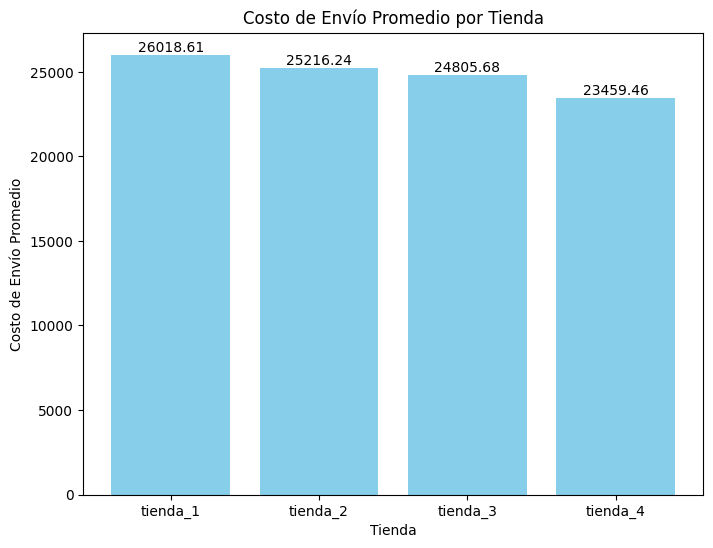

In [ ]:

import matplotlib.pyplot as plt
# Calculate the average shipping cost for each store
average_shipping_cost = combined_df.groupby('Tienda')['Costo de envío'].mean()

# Print the results
print("\nCosto de envío promedio por tienda:")
print(average_shipping_cost)

# Create a bar plot for visualization with data labels
plt.figure(figsize=(8, 6))
bars = plt.bar(average_shipping_cost.index, average_shipping_cost.values, color='skyblue')
plt.xlabel("Tienda")
plt.ylabel("Costo de Envío Promedio")
plt.title("Costo de Envío Promedio por Tienda")

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


##**Análisis de Datos para realizar la Venta de alguna de las 4 tiendas AluraStore Latam**


---


### **Fecha: 21 de Abril, 2025**
*Bruno Vitali*


---

# Introducción

Sr. Juan, tras realizar un análisis detallado del rendimiento de las cuatro tiendas de AluraStore Latam, este informe tiene como objetivo recomendarle la plataforma más adecuada para enfocar sus esfuerzos de venta. La sugerencia se basa en una evaluación comparativa de factores clave como ingresos, rendimiento segun categorías de productos, satisfacción del cliente, rendimiento de productos específico, costos de envío, entre otros.

### *1. Análisis Comparativo de ventas en las Tiendas*

tienda_1 es la líder en facturación 1.15B, que representa el 26.1% del total de ventas, seguida de cerca por tienda_2 1.11B, que representa el 25.4% del total de ventas y tienda_3 1.09B, que representa el 24.9% del total de ventas. Finalmente la tienda_4 1.03B, que representa el 23.6% del total de ventas genera los menores ingresos.


![Gráfico de ventas](https://docs.google.com/spreadsheets/d/e/2PACX-1vRsQtSWhCB0Bj_olXTGKvnpf1_eZBf8v0RT2RWlrxVZPMMqdIaRY4bq5zmfnAUCm7NLU4u2D2nbYzOm/pubchart?oid=239903820&format=image)

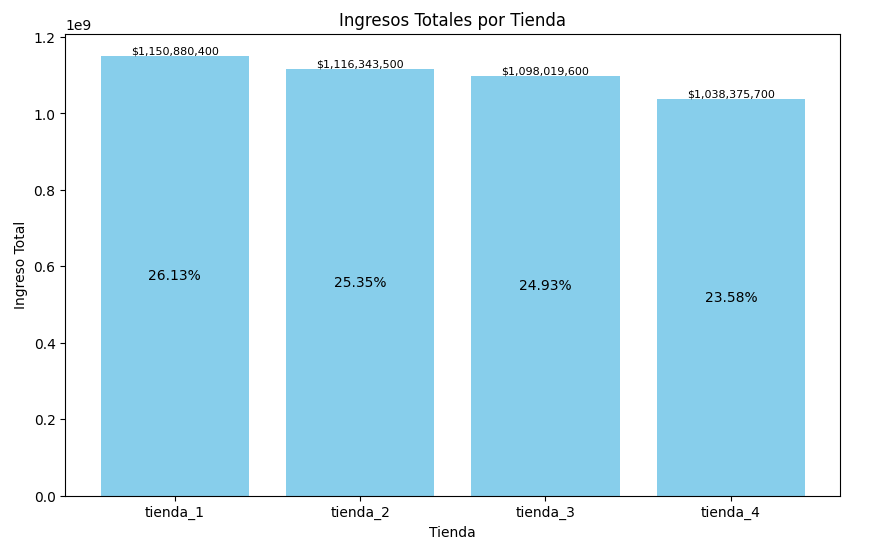




###*2. Análisis Comparativo de las Tiendas*

El análisis revela que Muebles, Electronicos, Electrodomesticos y Juguetes se posicionan de manera consistente como las categorías de mayor fortaleza comercial en la totalidad de las tiendas analizadas, con pequeñas variaciones que suponemos responden a variables demograficas asociadas a la ubicación de la tienda .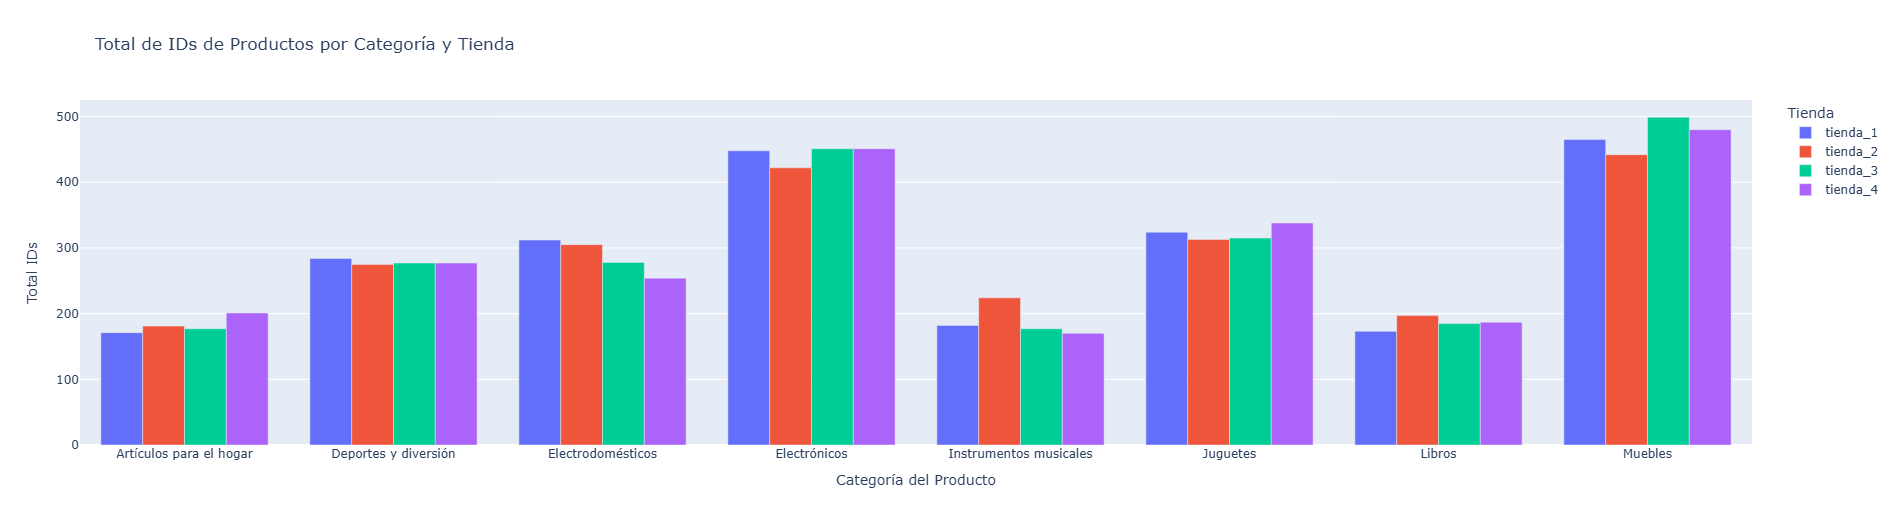

**Recomendación clave uno**: Productos pertenecientes a estas categorías se beneficiarían de una base de demanda robusta y establecida en cualquiera de las plataformas de venta, por lo que analizar la inclusion de nuevos productos en ellas podria significar un aumento de las ventas por tienda.

### *3*. Satisfacción del Cliente (Calificaciones Promedio):

La evaluación de la satisfacción del cliente indica que todas las tiendas mantienen una calificación promedio favorable, situándose en torno a 4 sobre 5.

Se observa una ventaja marginal en las calificaciones promedio para tienda 3 con un 4.05 y tienda 2 con un 4.04 en comparación con tienda 1 con un 3.98 y tienda 4 con un 4.00.

Implicación: Estos resultados sugieren un nivel general de satisfacción del cliente positivo en todas las plataformas. No obstante, las calificaciones ligeramente superiores en tienda 2 y tienda 3 podrían interpretarse como un indicativo de una base de consumidores marginalmente más satisfecha o con menor propensión a la crítica. Resulta pertinente señalar la recurrencia de
alificaciones inferiores para productos específicos a través de múltiples tiendas.


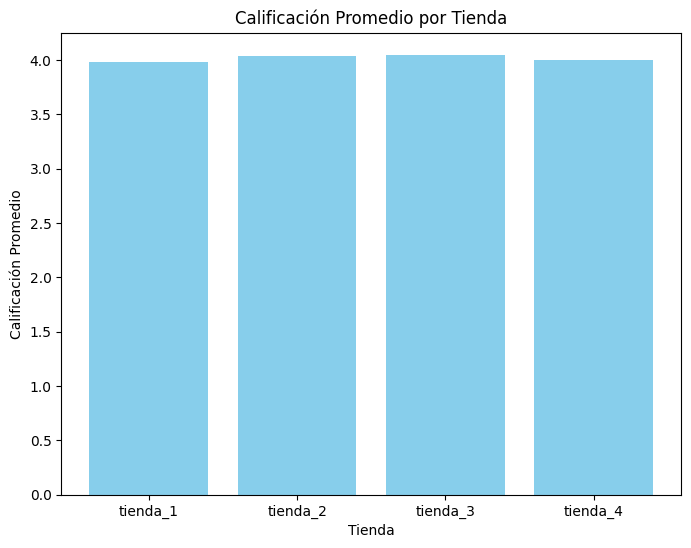

### *4. Rendimiento de Productos (Ventas):*

El análisis de rendimiento por producto evidencia que artículos de alto valor, tales como televisores, refrigeradores e iPhones, figuran de manera prominente entre los más vendidos en términos de ingresos generados.

Por otro lado, productos caracterizados por una alta rotación (e.g., armarios, microondas, artículos de programación, camas, mesas) lideran las ventas en términos de unidades despachadas, como se observa visualmente en el gráfico adjunto con picos para productos como 'Armario' en tienda 1, 'Iniciando en programación' en tienda 2 o 'Cama box' en tienda 4.

El gráfico de cantidad vendida por producto ilustra claramente la variabilidad en el rendimiento de un mismo artículo entre las diferentes tiendas. Un producto puede tener una alta demanda en una tienda y una demanda significativamente menor en otra (por ejemplo, 'Armario' tiene un pico en tienda 1 pero valores más bajos en las demás).

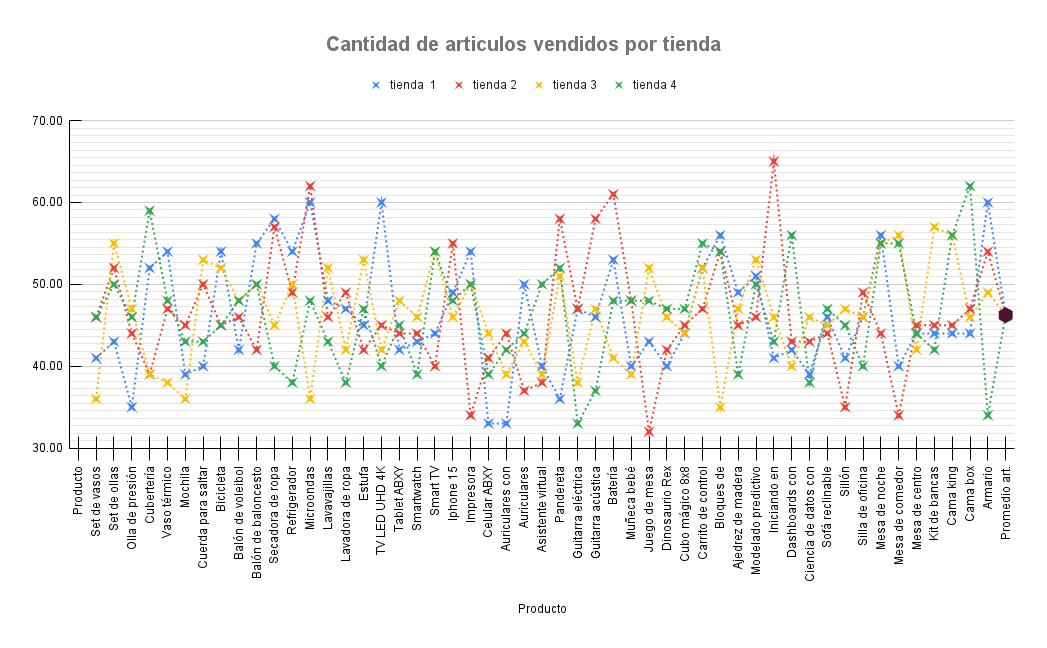

Finalmente se entrega el detalle de los productos mas y menos vendidos por tienda, para que la informacion sea utilizada a disposicion de los equipos de analisis de inversion

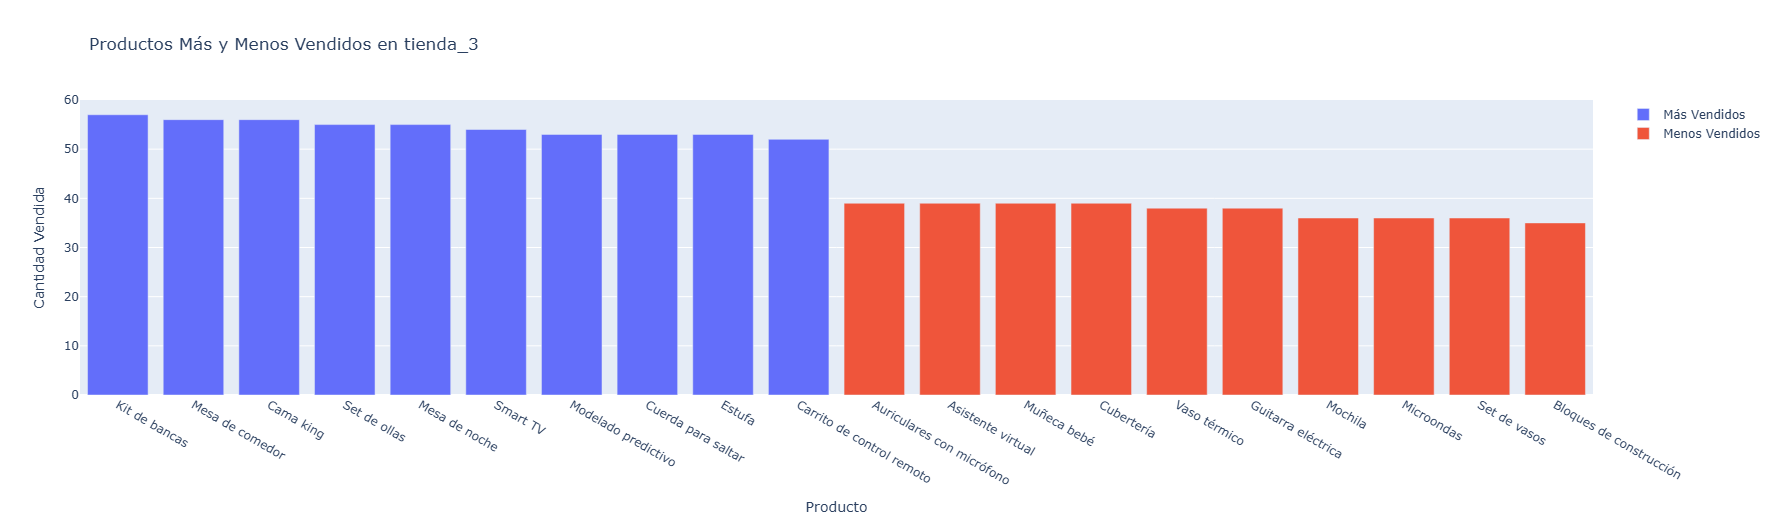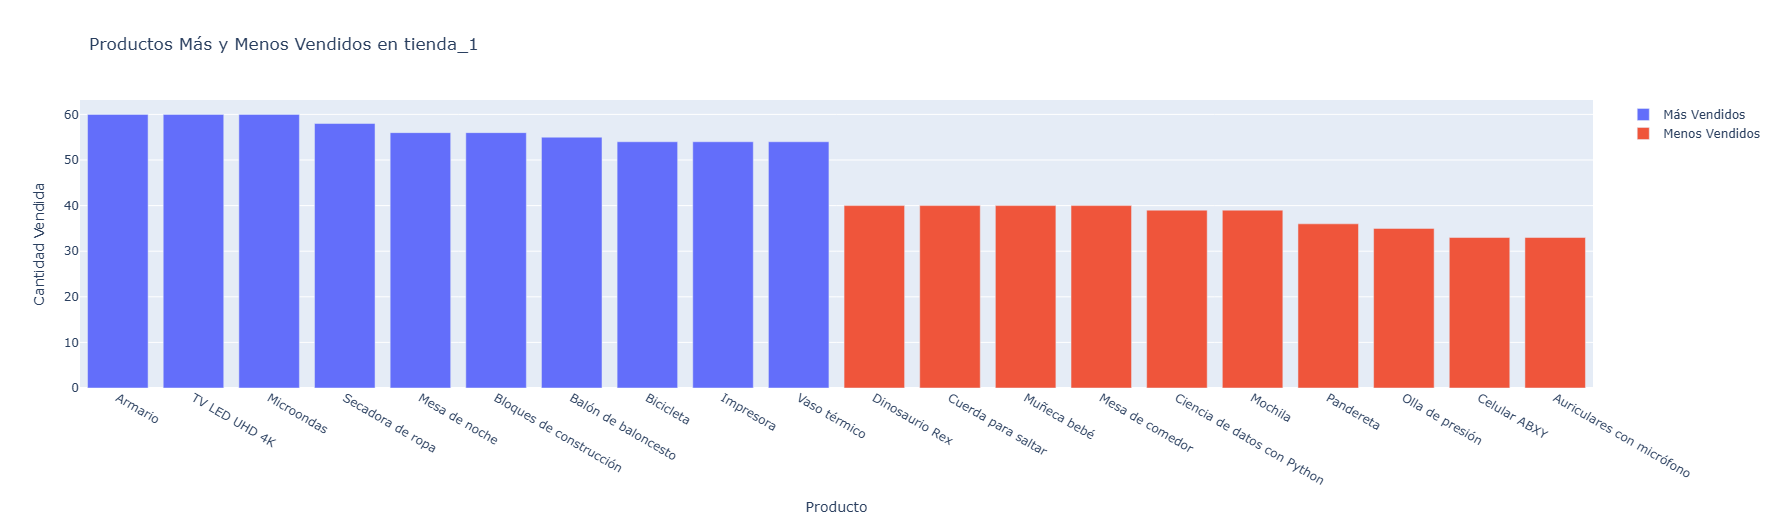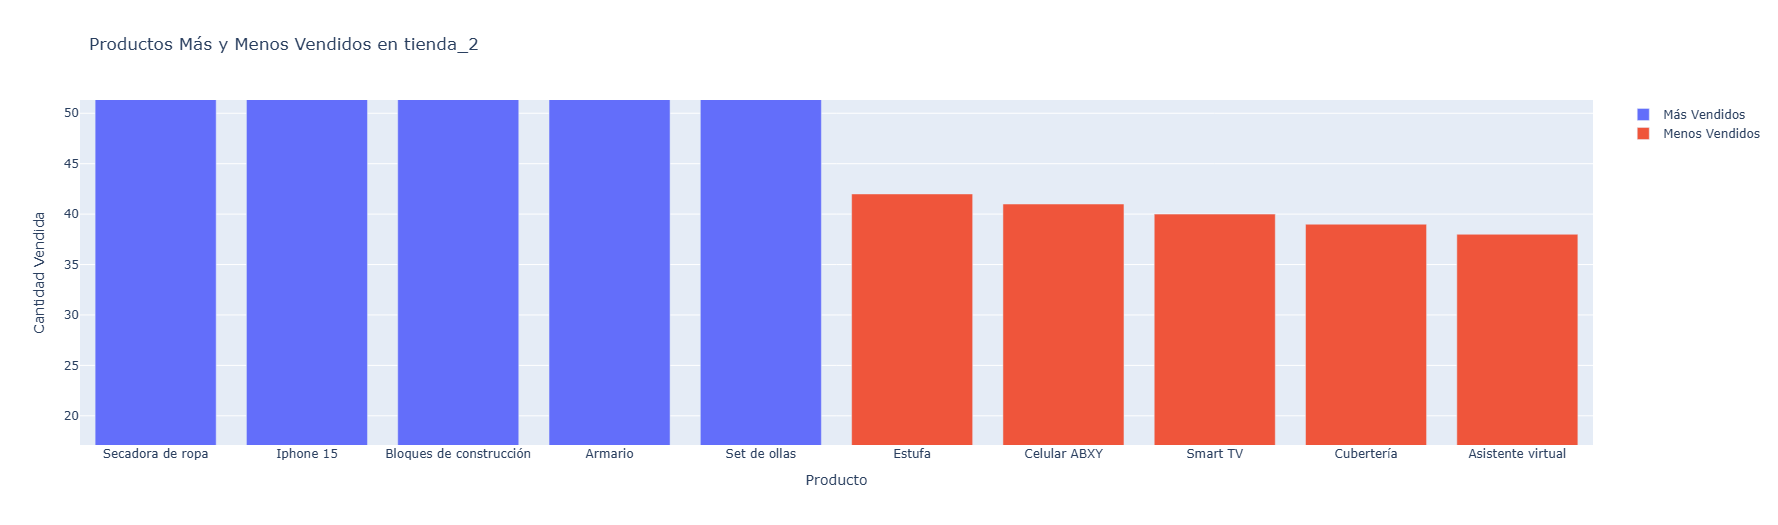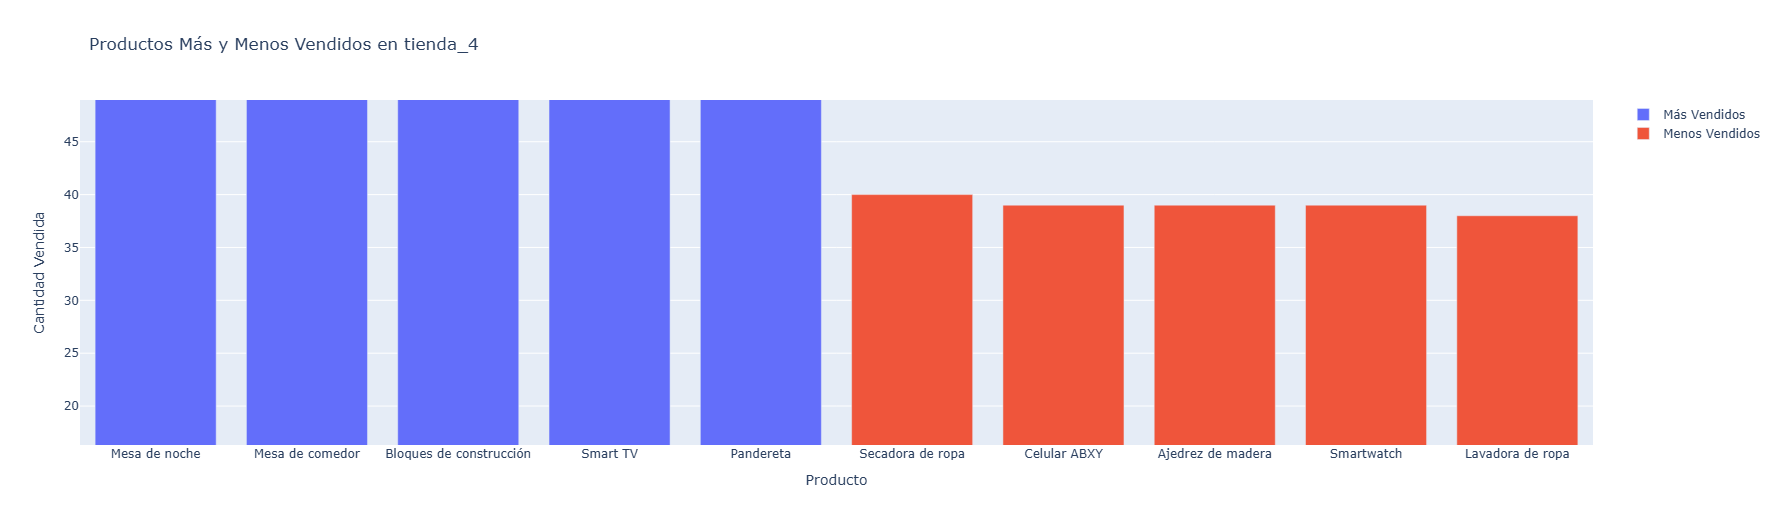



**Recomendación clave 2:** Definir lineas de la estrategia comercial a adoptar considerando si el enfoque a desarrollar se centra en productos de alto valor unitario o en aquellos de mayor volumen de ventas.

### *4. Costo de Envío Promedio:*
tienda_4 presenta el costo de envío promedio más bajo, con un valor de $23,459.

En contraposición, tienda_1 registra el promedio más elevado, alcanzando los $26,019.

Las tiendas tienda_2 (25,216) y tienda_3 (24,806) se sitúan en un rango intermedio en cuanto a este indicador.

Implicación: Para productos cuyo costo de envío representa un factor crítico (debido a peso, volumen o márgenes ajustados), tienda_4 emerge como una opción potencialmente atractiva. Por el contrario, tienda_1 podría suponer un desafío logístico o de costos mayor.


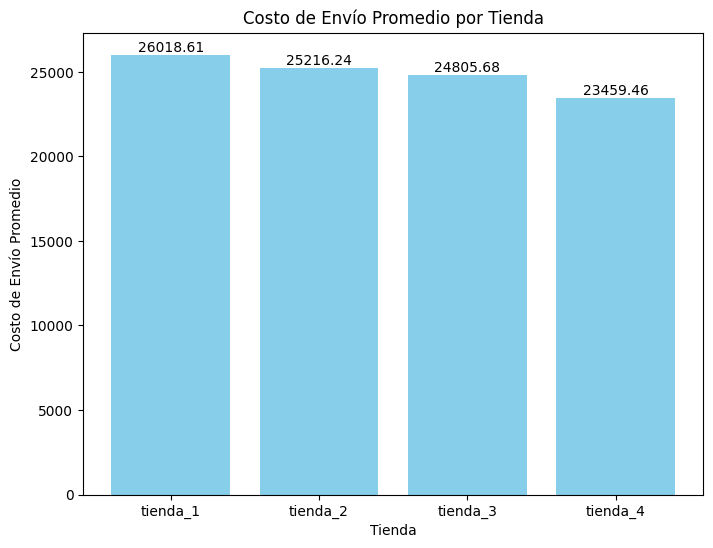

## ***Revisión de Indicadores Clave (Perspectiva de Desinversión):***

*Contribución a Ingresos y Tamaño del Mercado:* tienda_4 es consistentemente la que menos aporta a la facturación total (23.6%), representando el segmento de mercado más pequeño dentro del ecosistema analizado. Desde una perspectiva de inversión y scale-up, los activos con menor contribución y menor mercado direccionable suelen ser los primeros candidatos a revisión si se busca optimizar el portafolio y concentrar recursos.

*Eficiencia Operativa (Costos de Envío):* Aquí el panorama es inverso. tienda_1, a pesar de ser líder en ingresos, presenta el mayor desafío operativo con los costos de envío promedio más altos (26,019). Esto puede erosionar márgenes si no se gestiona adecuadamente. tienda_4, por otro lado, es la más eficiente en este aspecto (23,459), lo cual es un punto a favor, especialmente para ciertos modelos de negocio o tipos de producto.

*Satisfacción del Cliente (Calificaciones):* No existe un diferenciador claro para la desinversión basado en este indicador. Todas las tiendas muestran niveles de satisfacción buenos y muy similares (alrededor de 4.0/5), lo que sugiere que la experiencia base del cliente es relativamente homogénea en el ecosistema.

Basado exclusivamente en los datos analizados (ingresos, costos promedio de envío, calificaciones, volumen de categorías/productos), la recomendación estratégica, si fuera necesario vender o desinvertir en una de las tiendas, sería:

### **Vender / Desinvertir en Tienda 4**

### **Justificación**

Menor Impacto Estratégico: Representa la menor porción del mercado total de AluraStore Latam en términos de facturación. Concentrar recursos en las tiendas 1, 2 y 3 probablemente generaría un mayor retorno sobre la inversión en términos absolutos.

Optimización de Recursos: Liberar los recursos (capital, gestión, marketing) asignados a tienda_4 permitiría reforzar las operaciones y el crecimiento en los mercados más grandes y establecidos.

Simplificación: Gestionar tres tiendas en lugar de cuatro puede llevar a eficiencias operativas y administrativas.

Riesgo vs. Recompensa: Si bien tienda_1 presenta un desafío operativo (envíos), su posición de liderazgo en ingresos la hace estratégicamente más valiosa y con mayor potencial de apalancamiento para el crecimiento general del negocio, asumiendo que sus márgenes son gestionables. El riesgo de perder el mercado más grande suele ser mayor que el de optimizar costos en él. La ventaja de tienda_4 (costo de envío) no parece compensar su menor escala general.

Consideraciones Finales:

Es fundamental recalcar que esta recomendación se basa en la información disponible. Una decisión final de desinversión debería incorporar imperativamente un análisis mas profundo y con mas informacion de la rentabilidad y márgenes por tienda (analizando por ejemplo, margenes de ganancias, inversion en recurso humano y otros gastos asociados al funcionamiento de la estructura, las tendencias de crecimiento individuales de cada una, el panorama competitivo local y los costos fijos asociados a cada operación.